In [1]:
# add capability to import from parent directory
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import pvmismatch as pvm
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Setting PV system layout cell and module parameters
str_len = 6 # number of modules in a string
str_num = 3 # number of (parallel connected) strings in the array
v_bypass = np.float64(-0.5)  # [V] trigger voltage of bypass diode
cell_area = np.float64(246.49)  # [cm^2] cell area
Isc0_T0 = 9.68 # [A] reference short circuit current
ncols_per_substr=[2]*3 # 3 bypass diodes with 2 series connected cell-columns
nrows=10 # number of cell rows in the module

# Building PV modules and system
pv_mod_pattern = pvm.pvmodule.standard_cellpos_pat(nrows=nrows,
                                                   ncols_per_substr=ncols_per_substr)
pv_mod = pvm.pvmodule.PVmodule(cell_pos=pv_mod_pattern, pvcells=None,
                               pvconst=None, Vbypass=v_bypass, cellArea=cell_area)


In [10]:
pv_cells = pv_mod.pvcells
for c in pv_cells:
    c.update(diode_model = '2diode', Isc0_T0 = Isc0_T0) # updating short circuit currents

pv_mod.setSuns(cells=list(range(0, len(pv_cells))), Ee=[1]*len(pv_cells))

pv_str = pvm.pvstring.PVstring(numberMods=str_len, pvmods=[pv_mod]*str_len)

pv_sys = pvm.pvsystem.PVsystem(numberStrs=str_num, pvstrs=[pv_str]*str_num,
                               numberMods=[str_len]*str_num,
                               pvmods=[pv_mod]*str_len)

2diode


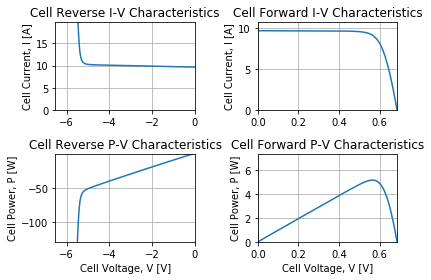

In [11]:
pv_cells[0].plot()

print(pv_mod.pvcells[0].diode_model)

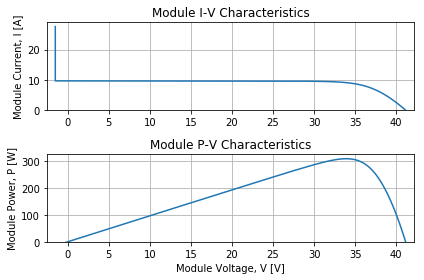

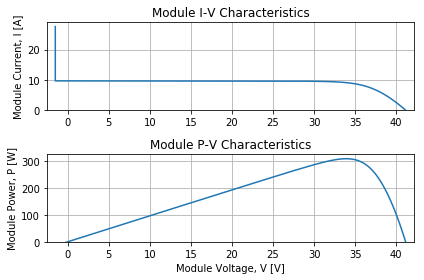

In [8]:
pv_mod.plotMod()

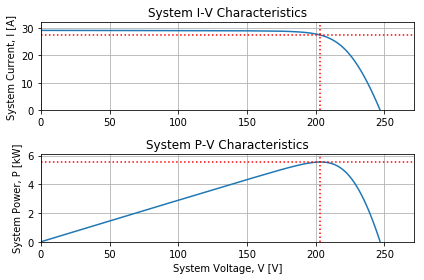

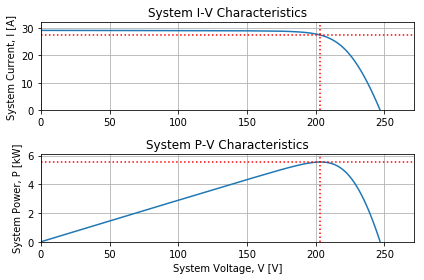

In [9]:
pv_sys.plotSys()